In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

MIN_PRICE_APR_10 = 4050
MAX_PRICE_APR_10 = 4100
MIN_PRICE_APR_13 = 4100
MAX_PRICE_APR_13 = 4150
MIN_PRICE_APR_14 = 4100
MAX_PRICE_APR_14 = 4150

# MLE estimates for Cauchy parameters based on historical daily returns 
x0 = 0 
gamma = 0.000005

In [9]:
df = pd.read_csv("data/apr-10-probability.csv")

df["returns"]=(df["SPX"]-df["SPX"].shift(1))/(df["SPX"])

offset = len(df["SPX"]) + 2
df["gamma"]=gamma*(offset-df["ID"])**(3/5)
df["mean"]=np.mean(df["returns"])*(offset-df["ID"])
df["std"]=np.std(df["returns"])*(offset-df["ID"])**(1/2)

In [10]:
df["probability"] = cauchy.cdf((MAX_PRICE_APR_10-df["SPX"])/df["SPX"], x0, df["gamma"]) - cauchy.cdf((MIN_PRICE_APR_10-df["SPX"])/df["SPX"], x0, df["gamma"])
df["probability_norm"] = norm.cdf((MAX_PRICE_APR_10-df["SPX"])/df["SPX"], 0, 0.002) - norm.cdf((MIN_PRICE_APR_10-df["SPX"])/df["SPX"], 0, 0.01)
df["market_probability"] = df["Mid"] / 100

Text(0.5, 1.0, 'Probabilities vs S&P 500 Price\nApril 10, 2023')

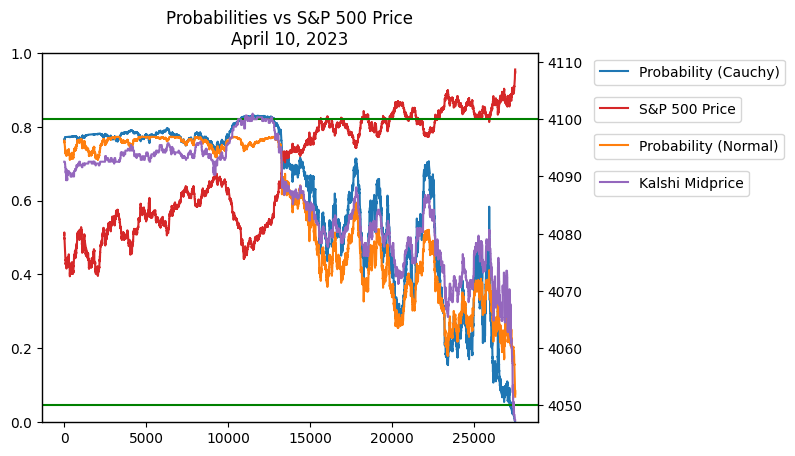

In [11]:
# Plot probability and price
fig, ax1 = plt.subplots()
ax1.plot(df["ID"], df["probability"], color="tab:blue")
ax1.set_ylim(bottom=0, top=1)

ax2 = ax1.twinx()
ax2.plot(df["ID"], df["SPX"], color="tab:red")
ax2.axhline(y=MIN_PRICE_APR_10, color='g', linestyle='-')
ax2.axhline(y=MAX_PRICE_APR_10, color='g', linestyle='-')

ax3 = ax1.twinx()
ax3.plot(df["ID"], df["probability_norm"], color="tab:orange")
# Plot ax3 on same scale as ax1
ax3.set_ylim(bottom=0, top=1)
# Don't plot ax3 y axis values
ax3.set_yticks([])

ax4 = ax1.twinx()
ax4.plot(df["ID"], df["market_probability"], color="tab:purple")
# Plot ax3 on same scale as ax1
ax4.set_ylim(bottom=0, top=1)
# Don't plot ax3 y axis values
ax4.set_yticks([])

# Plot legend
ax1.legend(["Probability (Cauchy)"], bbox_to_anchor=(1.10, 1), loc="upper left")
ax2.legend(["S&P 500 Price"], bbox_to_anchor=(1.10, 0.9), loc="upper left")
ax3.legend(["Probability (Normal)"], bbox_to_anchor=(1.10, 0.8), loc="upper left")
ax4.legend(["Kalshi Midprice"], bbox_to_anchor=(1.10, 0.7), loc="upper left")
plt.title("Probabilities vs S&P 500 Price\nApril 10, 2023")

In [13]:
df2 = pd.read_csv("data/apr-13-probability.csv")

df2["returns"]=(df2["SPX"]-df2["SPX"].shift(1))/(df2["SPX"])

offset = len(df2["SPX"]) + 2
df2["gamma"]=gamma*(offset-df2["ID"])**(3/5)
df2["mean"]=np.mean(df2["returns"])*(offset-df2["ID"])
df2["std"]=np.std(df2["returns"])*(offset-df2["ID"])**(1/2)

In [14]:
df2["probability"] = cauchy.cdf((MAX_PRICE_APR_13-df2["SPX"])/df2["SPX"], x0, df2["gamma"]) - cauchy.cdf((MIN_PRICE_APR_13-df2["SPX"])/df2["SPX"], x0, df2["gamma"])
df2["probability_norm"] = norm.cdf((MAX_PRICE_APR_13-df2["SPX"])/df2["SPX"], 0, 0.002) - norm.cdf((MIN_PRICE_APR_13-df2["SPX"])/df2["SPX"], 0, 0.002)
df2["market_probability"] = df2["Mid"] / 100

Text(0.5, 1.0, 'Probabilities vs S&P 500 Price\nApril 13, 2023')

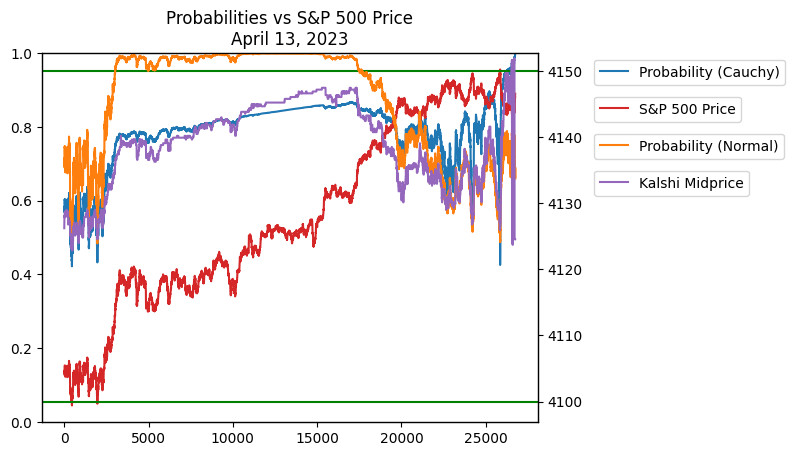

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(df2["ID"], df2["probability"], color="tab:blue")
ax1.set_ylim(bottom=0, top=1)

ax2 = ax1.twinx()
ax2.plot(df2["ID"], df2["SPX"], color="tab:red")
ax2.axhline(y=MIN_PRICE_APR_13, color='g', linestyle='-')
ax2.axhline(y=MAX_PRICE_APR_13, color='g', linestyle='-')

ax3 = ax1.twinx()
ax3.plot(df2["ID"], df2["probability_norm"], color="tab:orange")
ax3.set_ylim(bottom=0, top=1)
ax3.set_yticks([])

ax4 = ax1.twinx()
ax4.plot(df2["ID"], df2["market_probability"], color="tab:purple")
ax4.set_ylim(bottom=0, top=1)
ax4.set_yticks([])

# Plot legend
ax1.legend(["Probability (Cauchy)"], bbox_to_anchor=(1.10, 1), loc="upper left")
ax2.legend(["S&P 500 Price"], bbox_to_anchor=(1.10, 0.9), loc="upper left")
ax3.legend(["Probability (Normal)"], bbox_to_anchor=(1.10, 0.8), loc="upper left")
ax4.legend(["Kalshi Midprice"], bbox_to_anchor=(1.10, 0.7), loc="upper left")
plt.title("Probabilities vs S&P 500 Price\nApril 13, 2023")

In [30]:
df3 = pd.read_csv("data/apr-14-probability.csv")

df3["returns"]=(df3["SPX"]-df3["SPX"].shift(1))/(df3["SPX"])

offset = len(df3["SPX"]) + 3
df3["gamma"]=gamma*(offset-df3["ID"])**(3/5)
df3["mean"]=np.mean(df3["returns"])*(offset-df3["ID"])
df3["std"]=np.std(df3["returns"])*(offset-df3["ID"])**(1/2)

In [31]:
df3["probability"] = cauchy.cdf((MAX_PRICE_APR_14-df3["SPX"])/df3["SPX"], x0, df3["gamma"]) - cauchy.cdf((MIN_PRICE_APR_14-df3["SPX"])/df3["SPX"], x0, df3["gamma"])
df3["probability_norm"] = norm.cdf((MAX_PRICE_APR_14-df3["SPX"])/df3["SPX"], df3["mean"], df3["std"]) - norm.cdf((MIN_PRICE_APR_14-df3["SPX"])/df3["SPX"], df3["mean"], df3["std"])
df3["market_probability"] = df3["Mid"] / 100

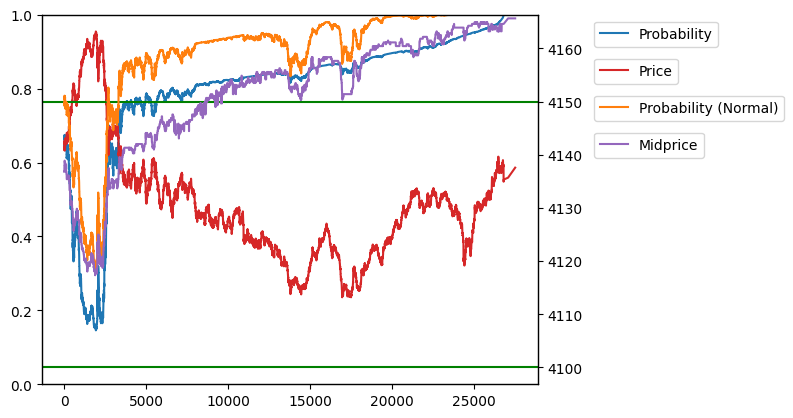

In [32]:
fig, ax1 = plt.subplots()
ax1.plot(df3["ID"], df3["probability"], color="tab:blue")
ax1.set_ylim(bottom=0, top=1)

ax2 = ax1.twinx()
ax2.plot(df3["ID"], df3["SPX"], color="tab:red")
ax2.axhline(y=MIN_PRICE_APR_14, color='g', linestyle='-')
ax2.axhline(y=MAX_PRICE_APR_14, color='g', linestyle='-')

ax3 = ax1.twinx()
ax3.plot(df3["ID"], df3["probability_norm"], color="tab:orange")
ax3.set_ylim(bottom=0, top=1)
ax3.set_yticks([])

ax4 = ax1.twinx()
ax4.plot(df3["ID"], df3["market_probability"], color="tab:purple")
ax4.set_ylim(bottom=0, top=1)
ax4.set_yticks([])

# Plot legend
ax1.legend(["Probability"], bbox_to_anchor=(1.10, 1), loc="upper left")
ax2.legend(["Price"], bbox_to_anchor=(1.10, 0.9), loc="upper left")
ax3.legend(["Probability (Normal)"], bbox_to_anchor=(1.10, 0.8), loc="upper left")
ax4.legend(["Midprice"], bbox_to_anchor=(1.10, 0.7), loc="upper left")